Лабораторна робота 4

Тема: Бінарна класифікація на основі даних Titanic

Ознайомлення з даними:

In [5]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


titanic = pd.read_csv('/Users/alexeipavlenko/Documents/Data_Science-1/Lab4/train.csv')

print(titanic.head(10))
print(titanic.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

Попередня обробка даних:

In [12]:
import seaborn as sns
import pandas as pd

titanic_data = pd.read_csv('/Users/alexeipavlenko/Documents/Data_Science-1/Lab4/train.csv')

#Заповнення пропусків у змінній Age середнім значенням
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

#Заповнення пропусків у змінній Embarked найбільш поширеним значенням
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

#Закодування категоріальних змінних (Sex та Embarked)
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

#Створення нової ознаки FamilySize (SibSp + Parch)
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']

titanic_data.head(10)

/var/folders/f4/gn0xg2wj5ln_fbb_v_0_2h940000gn/T/ipykernel_24486/4155128410.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
/var/folders/f4/gn0xg2wj5ln_fbb_v_0_2h940000gn/T/ipykernel_24486/4155128410.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,True,False,True,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,False,False,False,1
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,False,False,True,1
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,True,False,True,0
5,6,0,3,"Moran, Mr. James",29.699118,0,0,330877,8.4583,NaN,True,True,False,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.000000,0,0,17463,51.8625,E46,True,False,True,0
7,8,0,3,"Palsson, Master. Gosta Leonard",2.000000,3,1,349909,21.0750,NaN,True,False,True,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.000000,0,2,347742,11.1333,NaN,False,False,True,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.000000,1,0,237736,30.0708,NaN,False,False,False,1


Поділ даних на тренувальну та тестову вибірки:

In [13]:
from sklearn.model_selection import train_test_split

#Вибір залежної змінної (Survived) та незалежних змінних (інші)
X = titanic_data.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'])
y = titanic_data['Survived']

#Поділ на тренувальну (80%) та тестову (20%) вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Перевірка розмірів вибірок
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 9) (179, 9) (712,) (179,)


Побудова моделей:

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Імпорт необхідної функції для поділу даних
from sklearn.model_selection import train_test_split

#Вибір залежної змінної (Survived) та незалежних змінних (інші)
X = titanic_data.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'])
y = titanic_data['Survived']

#Поділ на тренувальну (80%) та тестову (20%) вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Функція для тренування та оцінки моделей
def evaluate_model(model):
    #Тренування моделі
    model.fit(X_train, y_train)
    
    #Передбачення на тестовій вибірці
    y_pred = model.predict(X_test)
    
    #Оцінка метрик
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1:.4f}')
    print()

#Логістична регресія
print("Logistic Regression:")
log_reg = LogisticRegression(max_iter=1000)
evaluate_model(log_reg)

#Дерева рішень
print("Decision Tree:")
decision_tree = DecisionTreeClassifier()
evaluate_model(decision_tree)

#Випадковий ліс
print("Random Forest:")
random_forest = RandomForestClassifier()
evaluate_model(random_forest)

Logistic Regression:
Accuracy: 0.8101
Precision: 0.7857
Recall: 0.7432
F1-score: 0.7639

Decision Tree:
Accuracy: 0.7821
Precision: 0.7465
Recall: 0.7162
F1-score: 0.7310

Random Forest:
Accuracy: 0.8380
Precision: 0.8261
Recall: 0.7703
F1-score: 0.7972



Оцінка результатів:

Logistic Regression:


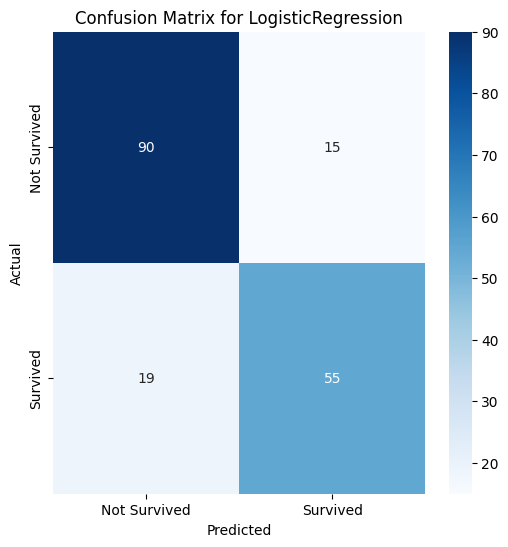

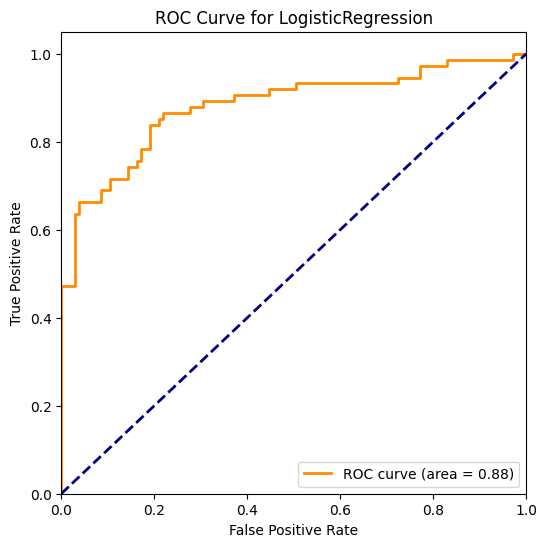

Decision Tree:


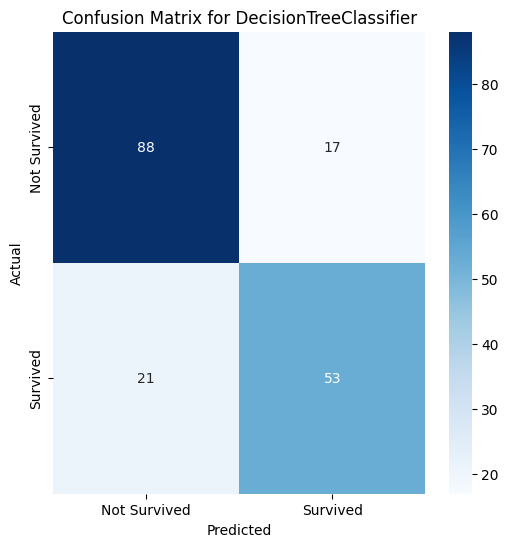

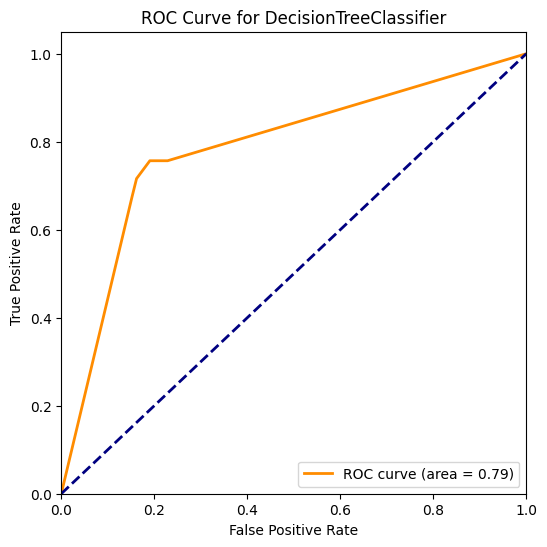

Random Forest:


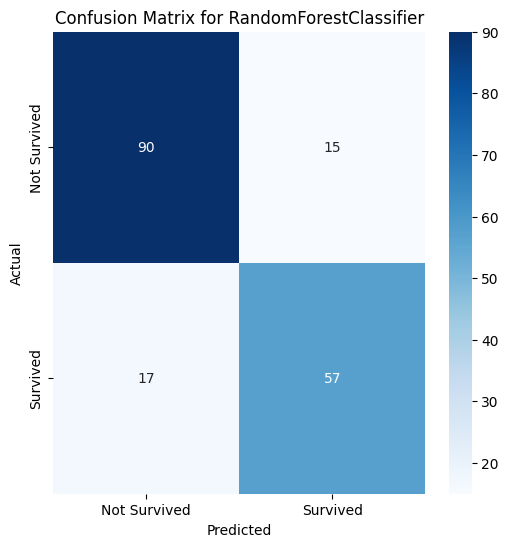

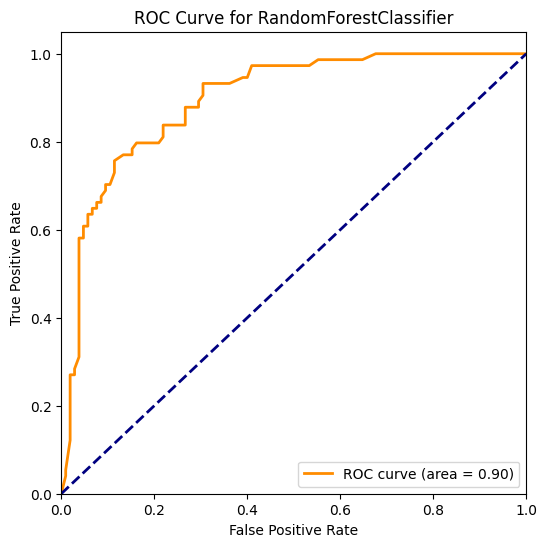

In [16]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

#Функція для побудови матриці плутанини
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.show()

#Функція для побудови ROC-кривої та обчислення AUC
def plot_roc_curve(model, X_test, y_test):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model.__class__.__name__}')
    plt.legend(loc="lower right")
    plt.show()

#Оцінка та побудова графіків для кожної моделі

#Логістична регресія
print("Logistic Regression:")
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
plot_confusion_matrix(log_reg, X_test, y_test)
plot_roc_curve(log_reg, X_test, y_test)

#Дерева рішень
print("Decision Tree:")
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
plot_confusion_matrix(decision_tree, X_test, y_test)
plot_roc_curve(decision_tree, X_test, y_test)

#Випадковий ліс
print("Random Forest:")
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
plot_confusion_matrix(random_forest, X_test, y_test)
plot_roc_curve(random_forest, X_test, y_test)

Оптимізація моделі та порівняння результатів:


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

#Розділ даних X і y вже визначені
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Крос-валідація для Логістичної регресії
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
print("Logistic Regression Cross-Validation Accuracy: ", log_reg_scores.mean())

#Крос-валідація для Дерева рішень
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_scores = cross_val_score(decision_tree, X_train, y_train, cv=5, scoring='accuracy')
print("Decision Tree Cross-Validation Accuracy: ", decision_tree_scores.mean())

#Оптимізація гіперпараметрів для Випадкового лісу
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_forest = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

#Тренування з оптимізацією гіперпараметрів
grid_search.fit(X_train, y_train)

#Виведення найкращих гіперпараметрів
print("Best Parameters for Random Forest: ", grid_search.best_params_)

#Оцінка моделі на тестовій вибірці
best_rf = grid_search.best_estimator_

#Функція для оцінки моделі
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

#Оцінка моделей
log_reg_metrics = evaluate_model(log_reg, X_test, y_test)
decision_tree_metrics = evaluate_model(decision_tree, X_test, y_test)
best_rf_metrics = evaluate_model(best_rf, X_test, y_test)

#Порівняння результатів
models = ['Logistic Regression', 'Decision Tree', 'Random Forest (Optimized)']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
results = pd.DataFrame([log_reg_metrics, decision_tree_metrics, best_rf_metrics], index=models, columns=metrics)

print("\nComparison of Models:")
print(results)

Logistic Regression Cross-Validation Accuracy:  0.7906628582684921
Decision Tree Cross-Validation Accuracy:  0.7415837683443317
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;

Непогані результати у логістичної регресії та випадкового лісу

Творче завдання:

1. Аналіз важливості ознак

	1.	Визначення важливості ознак:
	•	Використання методів, таких як Mean Decrease Impurity (MDI) або Mean Decrease Accuracy (MDA), допоможуть оцінити, які ознаки найбільше знижують impurity у випадковому лісі.
	•	Візуалізація важливості ознак за допомогою графіків (наприклад, стовпчикові діаграми), щоб легше сприймати дані.
	2.	Інтерпретація результатів:
	•	Проаналізуйте, які ознаки мають найвищу важливість, і спробуйте зрозуміти, чому вони мають такий вплив. Наприклад, у даних Титаніка ознаки, такі як вік, клас каюти, кількість родичів на борту можуть бути критично важливими для прогнозування виживання.

2. Пропозиції для покращення моделі

	1.	Додавання нових ознак:
	Створення нових ознак на основі вже існуючих, наприклад:
	•	Сумарний вік родини: об’єднати вік пасажира та його родичів.
	•	Статус пасажира: класифікація пасажирів на основі їх соціально-економічного статусу (багаті/бідні).
	•	Число дітей на борту: для оцінки, як на виживання впливають діти.
	2.	Удосконалення обробки пропущених даних:
	Замість простого видалення рядків з пропущеними даними, можна спробувати:
	•	Використовувати імпутацію (заміщення пропущених значень) на основі медіан, середніх значень або найближчих сусідів.
	•	Додати окрему ознаку для відзначення, чи є значення пропущеними, щоб модель могла навчитися на цьому.
	3.	Налаштування гіперпараметрів:
	•	Використати перекрестну перевірку для вибору оптимальних значень гіперпараметрів, таких як кількість дерев, максимальна глибина дерев, мінімальна кількість зразків у листі.
	4.	Аналіз впливу взаємодій:
	•	Розглянути можливість аналізу взаємодій між ознаками, наприклад, комбінування статі та класу каюти, щоб виявити складні залежності.

Висновок

Аналіз важливості ознак і внесення покращень у модель випадкового лісу можуть суттєво підвищити її точність і зрозумілість. Важливо експериментувати з різними підходами та перевіряти результати, щоб знайти найефективніші рішення.